In [1]:
import cv2

import torch
print(torch.__version__)
import torchvision
print(torchvision.__version__)
from torchvision import transforms as torchtrans
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

import utils
from utils import *

import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

2.0.1+cu117
0.15.2+cu117


In [2]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [3]:
dataset_location = utils.load_rf_data(9)
dataset_location

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.153, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to Football-Player-Detection-8 in yolov8:: 100%|██████████| 115/115 [00:00<00:00, 5231.56it/s]


'/home/mikkel/VSC/football-player-detection/Football-Player-Detection-8'

In [4]:
inf_model = torchvision.models.detection.fasterrcnn_resnet50_fpn_v2(pretrained=True)

in_features = inf_model.roi_heads.box_predictor.cls_score.in_features

inf_model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes=5)

inf_model.to(device)

best_model = torch.load('faster_rcnn.pt')
inf_model.load_state_dict(best_model)

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_V2_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT` to get the most up-to-date weights.


<All keys matched successfully>

In [5]:
img = cv2.imread(f"{dataset_location}/valid/images/9f4df856_0_mp4-1_jpg.rf.1463a2e74baaa167f9152848d82589b8.jpg")
img.shape

(1080, 1920, 3)

Image device: cuda:0
Model device: CUDA


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


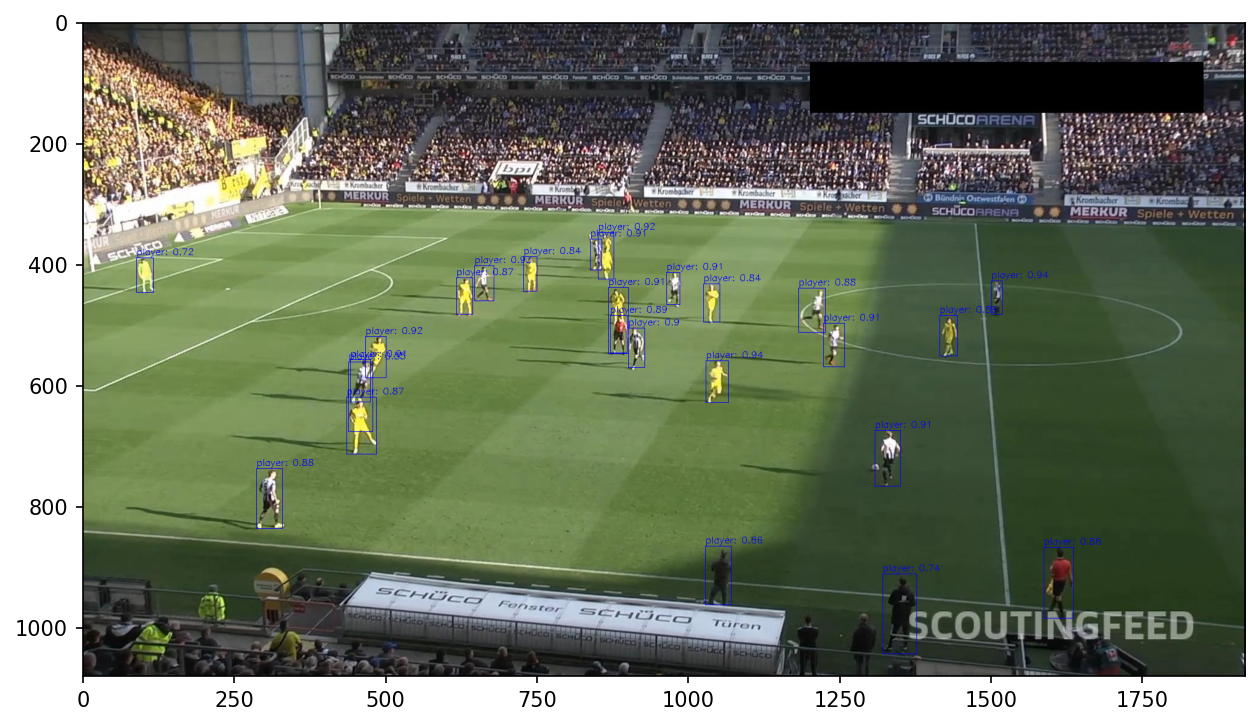

In [6]:
#from rcnn_utils import inference

inference(img, inf_model, device, conf=0.5)